# TP : La Segmentation bayésienne

## I) Une première idée des enjeux du problème 

#### Question 0 :

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd
from scipy.stats import norm
import copy as c
import pandas as pd
import seaborn as sns
import scipy.stats as stats

#### Question 1 :

###### a)

In [2]:
def bruit_gauss2(X,cl1,cl2,m1,sig1,m2,sig2):
    Y = np.zeros(X.shape, dtype=float)
    Y[X == cl1] = np.random.normal(m1, sig1, len(X[X == cl1]))
    Y[X == cl2] = np.random.normal(m2, sig2, len(X[X == cl2]))
    return Y

###### b)

In [3]:
def classif_gauss2(Y,cl1,cl2,m1,sig1,m2,sig2):
    S = np.where((norm.pdf(Y, m1, sig1) > norm.pdf(Y, m2, sig2)), cl1, cl2)
    return S

###### c)

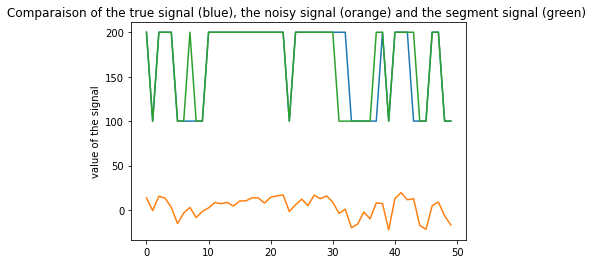

In [4]:
X0 = np.load("signal.npy")

counts, _ = np.histogram(X0, bins=int(X0.max()+1), range=(0,int(X0.max())))
cl1, cl2 = np.nonzero(counts)[0]

m1 = -10
sig1 = 10
m2 = 10
sig2 = 5

Y0 = bruit_gauss2(X0,cl1,cl2,m1,sig1,m2,sig2)
S0 = classif_gauss2(Y0,cl1,cl2,m1,sig1,m2,sig2)

plt.plot(X0)
plt.plot(Y0)
plt.plot(S0)
plt.ylabel('value of the signal')
plt.title('Comparaison of the true signal (blue), the noisy signal (orange) and the segment signal (green) ')
plt.show()

#### Question 2 :

In [5]:
def taux_erreur(A,B):
    diff = B - A
    diff[diff != 0] = 1
    diff = np.abs(diff)
    tau = np.sum(diff)
    tau = tau / len(diff)
    return tau

In [6]:
taux_erreur(X0, S0)

0.1

#### Question 3 :

###### a)

In [7]:
def compute_error(X,cl1,cl2,m1,sig1,m2,sig2,T):
    avg_error = np.zeros(T, dtype=float)
    for k in range(T):
        error = np.zeros(k+1, dtype=float)
        for i in range(k + 1):
            Y = bruit_gauss2(X,cl1,cl2,m1,sig1,m2,sig2)
            S = classif_gauss2(Y,cl1,cl2,m1,sig1,m2,sig2)
            error[i] = taux_erreur(X, S)
        avg_error[k] = np.mean(error)
    return avg_error

In [8]:
def plot_error(X,m1,sig1,m2,sig2,T,nSignal):
    counts, _ = np.histogram(X, bins=int(X.max()+1), range=(0,int(X.max())))
    cl1, cl2 = np.nonzero(counts)[0]
    avg_error = compute_error(X,cl1,cl2,m1,sig1,m2,sig2,T)
    plt.plot(avg_error)
    plt.ylabel('value of the error')
    plt.xlabel('value of T')
    plt.title('Error depending on value of T for signal' + str(nSignal) + ' and m1 = ' + str(m1) + ' , sig1 = ' + str(sig1)
             + ' , m2 = ' + str(m2) + ' , sig2 = ' + str(sig2))
    plt.show()
    return

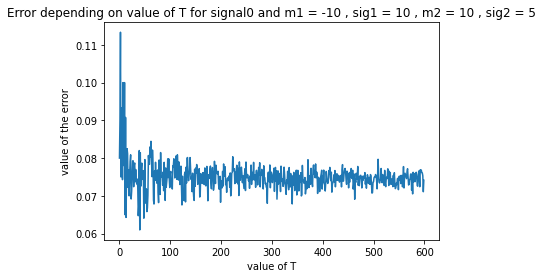

In [11]:
plot_error(X0,m1,sig1,m2,sig2,600,0)

###### b)

Lorsque T devient grand, il y a convergence vers la valeur réelle du taux d'erreur. 

###### c)

Cette propriété vient de la loi des grands nombres. Cette loi nous dit que la moyenne empirique converge vers l’espérance lorsque la taille de l’échantillon tend vers l’infini.

###### d)

Plus le signal est bruité, plus la convergence demande d'itérations. 

ie, lorsque le signal a un haut niveau de bruit, T doit être grand pour avoir une faible incertitude sur le taux d'erreur.

#### Question 4 :

In [12]:
coeff = [[120, 1, 130, 2], [127, 1, 127, 5], [127, 1, 128, 1], [127, 0.1, 128, 0.1], [127, 2, 128, 3]]
nSignal = np.arange(7)
X0 = np.load("signal.npy")
X1 = np.load("signal1.npy")
X = [X0, X1]
T = 600

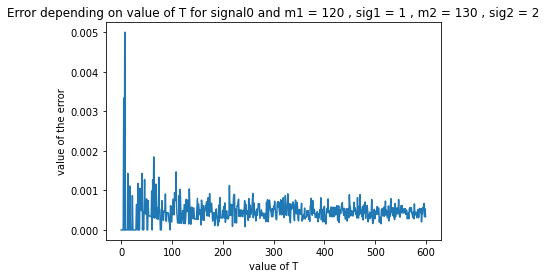

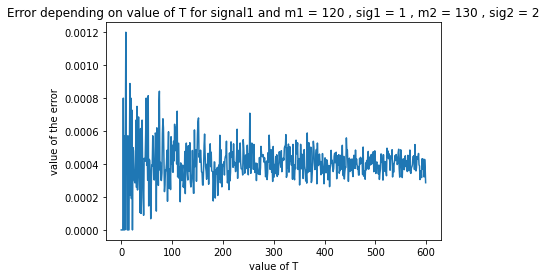

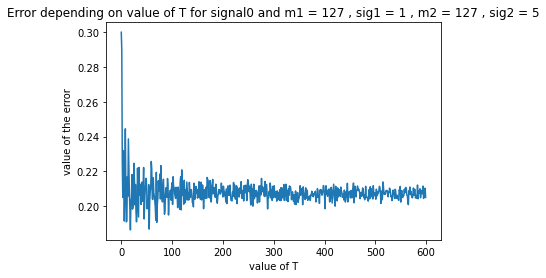

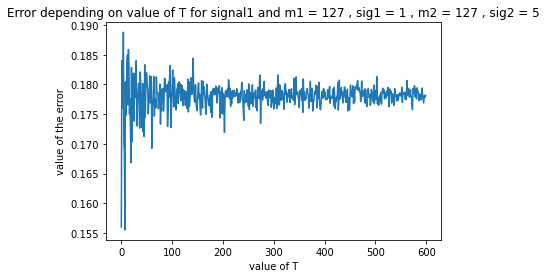

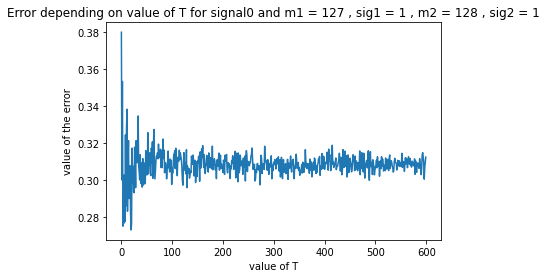

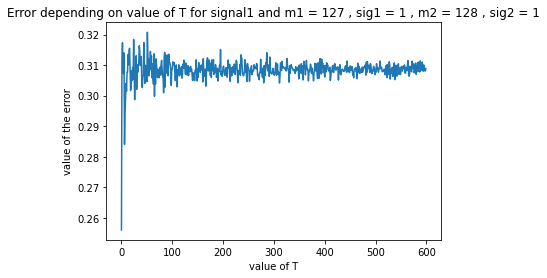

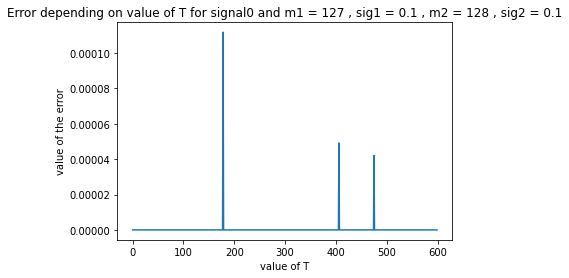

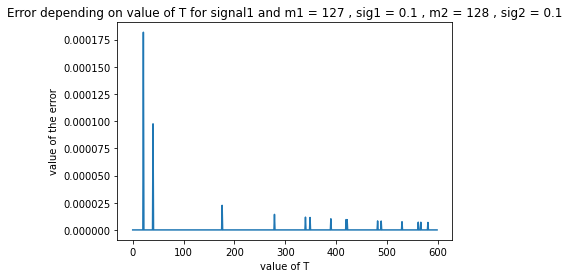

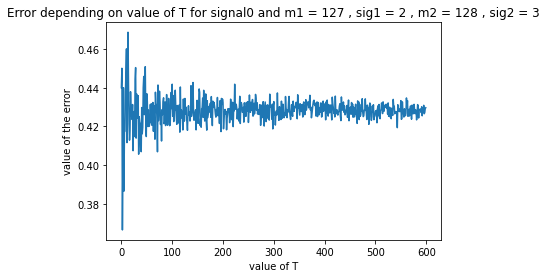

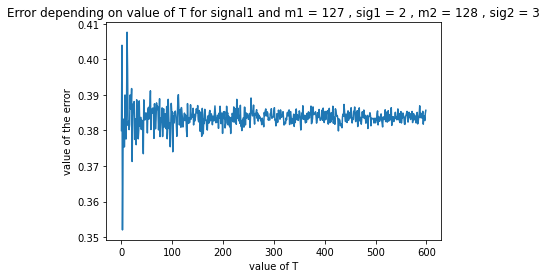

In [13]:
for c in coeff :
    k=0
    for x in X:
        plot_error(x,c[0],c[1],c[2],c[3],T,nSignal[k])
        k+=1

J'ai plot 2x5 courbes pour les signaux 0 et 1 afin de démontrer l'indépendance de la convergence en fonction de du signal mais une dépendance seulement au niveau de bruit. Nous étudierons cette dépendance dans la question suivante.

Nb : pour les courbes de paramètre [127, 0.1, 128, 0.1] , il ne s'agit pas d'une erreur de prog; les taux d'erreur sont bien compris entre 0 et 1. L'échelle est en 10e-5, qui est en partie masquée par le titre du graphe.

#### Question 5 :

Je vais définir une fonction plus simple afin de calculer l'erreur sans la double boucle sinon mon ordi ne va pas survivre ^^'

In [123]:
def compute_error_simpler(X,m1,sig1,m2,sig2,T):
    counts, _ = np.histogram(X, bins=int(X.max()+1), range=(0,int(X.max())))
    cl1, cl2 = np.nonzero(counts)[0]
    error = []
    for k in range(T):
        Y = bruit_gauss2(X,cl1,cl2,m1,sig1,m2,sig2)
        S = classif_gauss2(Y,cl1,cl2,m1,sig1,m2,sig2)
        error.append(taux_erreur(X, S))
    avg_error = np.mean(error)
    return avg_error

In [15]:
X0 = np.load("signal.npy")
X1 = np.load("signal1.npy")
X2 = np.load("signal2.npy")
X3 = np.load("signal3.npy")
X4 = np.load("signal4.npy")
X5 = np.load("signal5.npy")
coeff = [[120, 1, 130, 2], [127, 1, 127, 5], [127, 1, 128, 1], [127, 0.1, 128, 0.1], [127, 2, 128, 3]]
X = [X0, X1, X2, X3, X4, X5]
T = 600

tab = []
tab.append([" ", "bruit1","bruit2","bruit3","bruit4","bruit5"])

k=0
for x in X:
    
    tab.append(["signal" + str(k)])
    for c in coeff :
        tab[k+1].append(compute_error_simpler(x,c[0],c[1],c[2],c[3],T))
    k+=1

        
tab

[[' ', 'bruit1', 'bruit2', 'bruit3', 'bruit4', 'bruit5'],
 ['signal0',
  0.00039999999999999996,
  0.20873333333333333,
  0.31183333333333335,
  0.0,
  0.4292333333333333],
 ['signal1',
  0.00044,
  0.17978666666666665,
  0.30660666666666664,
  0.0,
  0.3844466666666666],
 ['signal2',
  0.0004053,
  0.17622376666666667,
  0.3084850666666667,
  1.6666666666666668e-07,
  0.38070563333333335],
 ['signal3',
  0.00040186666666666666,
  0.1769689,
  0.3085435333333333,
  3.0000000000000004e-07,
  0.38169933333333333],
 ['signal4',
  0.00040216666666666667,
  0.17692166666666664,
  0.30840633333333334,
  1.666666666666667e-07,
  0.3817107666666667],
 ['signal5',
  0.0004041333333333333,
  0.1761433,
  0.3086199666666667,
  1.3333333333333334e-07,
  0.3807185]]

Le tableau n'est pas très lisible, mettons le dans un dataframe et utilisons heatmap de seaborn afin de le rendre plus lisible :) (le temps d'execution de cette cellule est long, je n'ai pas voulu relancé le calcul, je sais que ce n'est pas très esthétique de laisser ce tableau illisible dans le code).

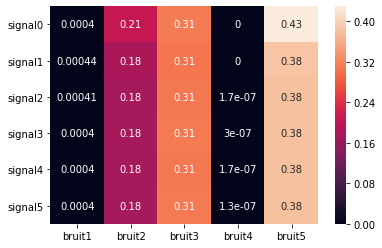

In [42]:
tab = np.array(tab)
df = pd.DataFrame(data=tab[1:, 1:], index=tab[1:, 0], columns=tab[0, 1:], dtype=float)
sns.heatmap(df, annot=True)

A part pour le signal 0, les valeurs de l'erreur sont les même independamment du signal. On pouvait s'attendre à ce résultat car une fois les signaux bruités, ils ont les même caractéristiques et la méthode pour les segmentés est la même. Si le signal 0 a une valeur légèrement différente, c'est probablement parce que la taille du signal est beaucoup plus faible (50 pour le signal 0, 250 pour le signal 1 et 50000 pour les autres).

On peut observer que pour le bruit 1 et 4, la valeur du taux d'erreur est très basse. On peut l'expliquer par le fait que les deux gaussiennes (dû à leurs valeur de moyennes et de std) ne se "chevauche" pas :

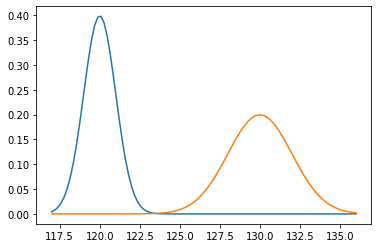

In [49]:
mu = 120
sig = 1
mu2 = 130
sig2 = 2

x = np.linspace(min(mu - 3*sig, mu2 - 3*sig2), max(mu + 3*sig, mu2 + 3*sig2), 100)
plt.plot(x, stats.norm.pdf(x, mu, sig))
plt.plot(x, stats.norm.pdf(x, mu2, sig2))
plt.show()

Je ne vais pas plot les gaussiennes pour le bruit 4, la logique est la même.

On peut remarquer que les taux d'erreur pour le bruit 2 sont relativement faible alors que les deux gaussiennes ont la même moyenne. Cependant leurs ecart-types sont très différentes donc lorsqu'une valeur est très "loin" de la moyenne est sera prédite comme appartenant à la classe 2.

Affichons les deux gaussiennes pour le bruit 5, ayant le taux d'erreur le plus haut :

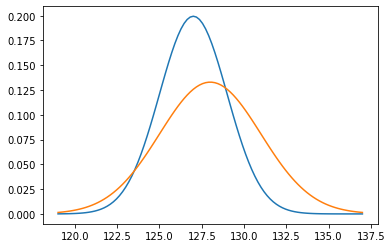

In [154]:
mu = 127
sig = 2
mu2 = 128
sig2 = 3

x = np.linspace(min(mu - 3*sig, mu2 - 3*sig2), max(mu + 3*sig, mu2 + 3*sig2), 100)
plt.plot(x, stats.norm.pdf(x, mu, sig))
plt.plot(x, stats.norm.pdf(x, mu2, sig2))
plt.show()

On peut voir que l'aire sous la courbe des deux gaussiennes se recouvrent, ce qui engendre une mauvaise prédiction. De plus, d'après les courbes de la question 4, on peut voir qu'il faut un T élevé pour avoir convergence vers la vraie valeur de l'erreur.

On peut donc qualifier de bruit fort lorsque les gaussiennes se recouvrent beaucoup, ie lorsque la convergence intervient après un nombre important d'itération.
A l'inverse, un bruit faible a pour caractéristique une stricte séparation des gaussiennes ie lorsque la valeur de leur moyenne OU de leur variance est très différente.

## II) Apport des méthodes bayésiennes de segmentation

#### Question 1 :

###### a)

In [9]:
def  calc_probaprio2(X,cl1,cl2):
    P = np.zeros(2, dtype=float)
    p1 = 0
    for x in X :
        if x == cl1 :
            p1 += 1
    p1 = p1/len(X)
    p2 = 1 - p1
    P[0] = p1
    P[1] = p2
    return P

In [10]:
def  calc_probaprio22(X,cl1,cl2):
    unique, counts = np.unique(X, return_counts=True)
    p1 = counts[unique == cl1]/np.sum(counts)
    p2 = 1 - p1
    return p1, p2

In [11]:
%%time
X0 = np.load("signal.npy")
counts, _ = np.histogram(X0, bins=int(X0.max()+1), range=(0,int(X0.max())))
cl1, cl2 = np.nonzero(counts)[0]
for k in range(100000):
    calc_probaprio2(X0,cl1, cl2)

Wall time: 1.23 s


In [12]:
%%time
X0 = np.load("signal.npy")
counts, _ = np.histogram(X0, bins=int(X0.max()+1), range=(0,int(X0.max())))
cl1, cl2 = np.nonzero(counts)[0]
for k in range(100000):
    calc_probaprio22(X0,cl1, cl2)

Wall time: 4.26 s


Je conserve finalement la première implémentation, qui est beaucoup plus rapide, et pourtant ce ne sont pas des opérations vectorielles.

###### b)

In [13]:
def MAP_MPM22(Y,cl1,cl2,p1,p2,m1,sig1,m2,sig2):
    S = np.zeros(len(Y), dtype=float)
    k=0
    for y in Y :
        if_cl1 = norm.pdf(y, m1, sig1)
        if_cl2 = norm.pdf(y, m2, sig2)
        coeff_w1 = p1 * if_cl1
        coeff_w2 = p2 * if_cl2
        if coeff_w1 > coeff_w2 : 
            S[k] = cl1
        else :
            S[k] = cl2
        k+=1
    return S

In [14]:
def MAP_MPM2(Y,cl1,cl2,p1,p2,m1,sig1,m2,sig2):
    S = np.where(p1 * (norm.pdf(Y, m1, sig1) > p2 * norm.pdf(Y, m2, sig2)), cl1, cl2)
    return S

In [21]:
%%time
X0 = np.load("signal.npy")
counts, _ = np.histogram(X0, bins=int(X0.max()+1), range=(0,int(X0.max())))
cl1, cl2 = np.nonzero(counts)[0]
m1,sig1,m2,sig2 = 120, 1, 130, 2
for k in range(1000):
    Y = bruit_gauss2(X0,cl1,cl2,m1,sig1,m2,sig2)
    p1, p2 = calc_probaprio2(X0,cl1, cl2)
    MAP_MPM22(Y,cl1,cl2,p1,p2,m1,sig1,m2,sig2)

Wall time: 13 s


In [22]:
%%time
X0 = np.load("signal.npy")
counts, _ = np.histogram(X0, bins=int(X0.max()+1), range=(0,int(X0.max())))
cl1, cl2 = np.nonzero(counts)[0]
m1,sig1,m2,sig2 = 120, 1, 130, 2
for k in range(1000):
    Y = bruit_gauss2(X0,cl1,cl2,m1,sig1,m2,sig2)
    p1, p2 = calc_probaprio2(X0,cl1, cl2)
    MAP_MPM2(Y,cl1,cl2,p1,p2,m1,sig1,m2,sig2)

Wall time: 462 ms


Par contre cette fois ci, il n'y a pas photo, il vaut mieux prendre les opérations vectorisées.

#### Question 2 :

In [23]:
def compute_error_simpler_bayes(X,m1,sig1,m2,sig2,T):
    counts, _ = np.histogram(X, bins=int(X.max()+1), range=(0,int(X.max())))
    cl1, cl2 = np.nonzero(counts)[0]
    error = []
    P = calc_probaprio2(X,cl1,cl2)
    p1, p2 = P[0], P[1]
    for k in range(T):
        Y = bruit_gauss2(X,cl1,cl2,m1,sig1,m2,sig2)
        S = MAP_MPM2(Y,cl1,cl2,p1,p2,m1,sig1,m2,sig2)
        error.append(taux_erreur(X, S))
    avg_error = np.mean(error)
    return avg_error

In [24]:
X0 = np.load("signal.npy")
X1 = np.load("signal1.npy")
X2 = np.load("signal2.npy")
X3 = np.load("signal3.npy")
X4 = np.load("signal4.npy")
X5 = np.load("signal5.npy")
coeff = [[120, 1, 130, 2], [127, 1, 127, 5], [127, 1, 128, 1], [127, 0.1, 128, 0.1], [127, 2, 128, 3]]
X = [X0, X1, X2, X3, X4, X5]
T = 600

tab = []
tab.append([" ", "bruit1","bruit2","bruit3","bruit4","bruit5"])

k=0
for x in X:
    tab.append(["signal" + str(k)])
    for c in coeff :
        tab[k+1].append(compute_error_simpler_bayes(x,c[0],c[1],c[2],c[3],T))
    print("iteration suivante")
    k+=1 

iteration suivante
iteration suivante
iteration suivante
iteration suivante
iteration suivante
iteration suivante


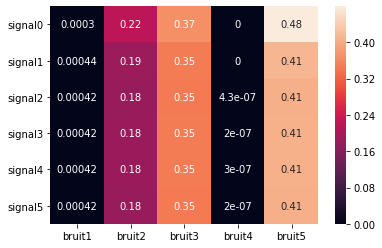

In [25]:
tab = np.array(tab)
df = pd.DataFrame(data=tab[1:, 1:], index=tab[1:, 0], columns=tab[0, 1:], dtype=float)
sns.heatmap(df, annot=True)

Les valeurs d'incertitudes sont légèrement plus élevés à l'aide des méthodes Bayésienne. Je ne peux certifié à 100% que ce n'est pas dû à la variance du taux d'erreurs mais ça semble peu probable : j'ai pris T = 600 et on peut voir qu'en dehors du signal 0, les autres possèdent exactement les mêmes valeurs (à une exception prêt pour le signal1 / bruit2 et bien sur pour les valeurs en e-7 du bruit4).

On peut préciser que pour le bruit2, la valeur d'erreur est equivalente entre les deux méthodes mais lorsque le bruit devient fort(bruit3 et bruit5), la méthode bayésienne donne un taux d'erreur plus élevé (respectivement +0.4 et +0.3) que la méthode frequentiste. Cette différence entre les deux méthodes semble croitre avec avec la vitesse de convergence du taux d'erreur.

#### Question 3 :

In [107]:
def simul22(n,cl1,cl2,p1,p2):
    X_simu = np.zeros(n, dtype=float)
    for k in range(n):
        p = rd.uniform(0, 1)
        if p < p1 :
            X_simu[k] = cl1
        else :
            X_simu[k] = cl2
    return X_simu

In [108]:
def simul2(n,cl1,cl2,p1,p2):
    random_uniform = np.random.uniform(0, 1, n)
    X_simu = np.where( random_uniform < p1, cl1, cl2)
    return X_simu

In [109]:
%%time
X = simul22(1000000,100,200,0.6,0.4)

Wall time: 712 ms


In [110]:
%%time
X = simul2(1000000,100,200,0.6,0.4)

Wall time: 29.9 ms


Une fois de plus, on génerera à l'aide d'opérations vectorisées.

#### Question 4 :

In [119]:
n = 50000
cl1 = 10
cl2 = 30
P = np.array([[0.999, 0.001],[0.99,0.01],[0.9,0.1],[0.7,0.3],[0.5,0.5]])
X1 = simul2(n,cl1,cl2,P[0,0],P[0,1])
X2 = simul2(n,cl1,cl2,P[1,0],P[1,1])
X3 = simul2(n,cl1,cl2,P[2,0],P[2,1])
X4 = simul2(n,cl1,cl2,P[3,0],P[3,1])
X5 = simul2(n,cl1,cl2,P[4,0],P[4,1])
coeff = [[120, 1, 130, 2], [127, 1, 127, 5], [127, 1, 128, 1], [127, 0.1, 128, 0.1], [127, 2, 128, 3]]
X = [X1, X2, X3, X4, X5]
T = 600

In [120]:
tab1 = []
tab1.append([" ", "bruit1","bruit2","bruit3","bruit4","bruit5"])
k=0
for x in X:
    tab1.append(["p1 = " + str(P[k,0]) + " p2 = " + str(P[k,1])])
    for c in coeff :
        tab1[k+1].append(compute_error_simpler_bayes(x,c[0],c[1],c[2],c[3],T))
    k+=1 

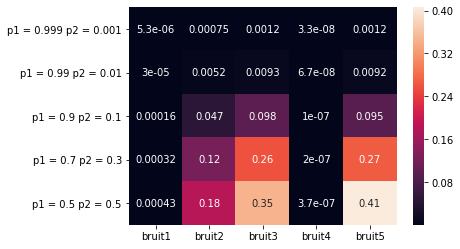

In [121]:
tab1 = np.array(tab1)
df1 = pd.DataFrame(data=tab1[1:, 1:], index=tab1[1:, 0], columns=tab1[0, 1:], dtype=float)
sns.heatmap(df1, annot=True)

Ci dessus : erreur calculé à l'aide de la méthode Bayésienne

In [124]:
tab2 = []
tab2.append([" ", "bruit1","bruit2","bruit3","bruit4","bruit5"])

k=0
for x in X:
    tab2.append(["p1 = " + str(P[k,0]) + " p2 = " + str(P[k,1])])
    for c in coeff :
        tab2[k+1].append(compute_error_simpler(x,c[0],c[1],c[2],c[3],T))
    k+=1

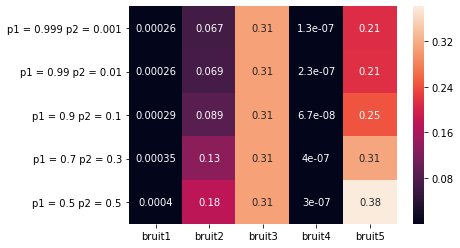

In [125]:
tab2 = np.array(tab2)
df2 = pd.DataFrame(data=tab2[1:, 1:], index=tab2[1:, 0], columns=tab2[0, 1:], dtype=float)
sns.heatmap(df2, annot=True)

Ci dessus : erreur calculé à l'aide de la méthode fréquentiste

On peut observer que lorsque les jeux de données sont très désequilibré (cad quand il y a une classe beaucoup plus présente qu'une autre ie lorsque dans les paramètres de nos classes simulées p1>>p2) la classification Bayésienne donne des taux d'erreurs beaucoup plus bas que la méthode fréquentiste. 

A l'inverse, lorsque les classes sont équilibrés, la méthode Bayésienne donne de moins bon résultat. Il faut donc privilégié la méthode Bayésienne lorsque les classes sont déséquilibrés et la méthode fréquentiste lorsque les classes sont équilibrés.

De plus, et même si les signaux 2 mais surtout 3 et 5 sont fortement bruités, la classification Bayésienne optient des taux d'erreurs très bas, alors qu'ils restent les mêmes pour la méthode fréquentiste. Représentons le taux d'erreur pour la classification Bayésienne en fonction de p1 pour le bruit 5 :

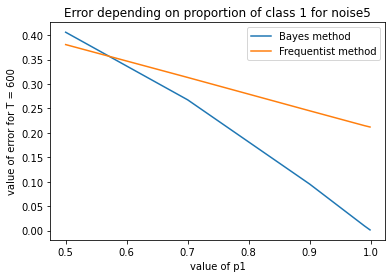

In [153]:
x = [0.999, 0.99, 0.9, 0.7, 0.5]

y1 =[]
for y in tab1[1:, 5] :
    y1.append(float(y))
y2 =[]
for y in tab2[1:, 5] :
    y2.append(float(y))

plt.plot(x, y1, label='Bayes method')
plt.plot(x, y2, label='Frequentist method')
plt.ylabel('value of error for T = 600')
plt.xlabel('value of p1')
plt.title('Error depending on proportion of class 1 for noise5')
plt.legend()
plt.show()

Malgré la décroissance des deux méthodes en fonction de p1, la méthode Bayésienne a une décroissance plus importante. Le point d'intersection des deux courbes se trouve autour de p1 = 0.58.

Ce résultat est encore plus impressionnant pour le bruit 3 :

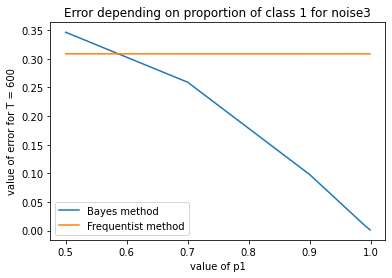

In [155]:
x = [0.999, 0.99, 0.9, 0.7, 0.5]

y1 =[]
for y in tab1[1:, 3] :
    y1.append(float(y))
y2 =[]
for y in tab2[1:, 3] :
    y2.append(float(y))

plt.plot(x, y1, label='Bayes method')
plt.plot(x, y2, label='Frequentist method')
plt.ylabel('value of error for T = 600')
plt.xlabel('value of p1')
plt.title('Error depending on proportion of class 1 for noise3')
plt.legend()
plt.show()

En effet, alors que la méthode de la partie 1 reste constante à un taux d'erreur = 0.31 qu'importe le déséquilibre entre les classes, la méthode Bayésienne décroit en fonction de p1. Le point d'intersection des deux courbes se trouve autour de p1 = 0.59.

Il faut rappeler que la caractéristique du bruit 3 est que les deux gaussiennes sont de même moyenne.